# Analyzing Employee Exit Surveys in DETE, and TAFE.

This analysis report was created to analyze employees exit surveys in the Training and Employment (DETE) and the Technical and Future Education (TAFE) institude in Queensland, Australia. The aim is to answer the below questions:

1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

To answer these questions, we will be basing our analysis on the following datasets:

1. DETE: https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey
2. TAFE: https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey

## Exploring the data

In [157]:
#setting up the environment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

### DETE

In [158]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [159]:
# Sample Data (First 5 rows)
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [160]:
# Counting unique values in 'SeparationType' column
dete_survey['SeparationType'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64

In [161]:
# Counting unique values in 'Cease Date' column
dete_survey['Cease Date'].value_counts()

2012          344
2013          200
01/2014        43
12/2013        40
09/2013        34
Not Stated     34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
04/2013         2
04/2014         2
08/2012         2
02/2014         2
07/2014         2
07/2006         1
07/2012         1
2010            1
09/2010         1
11/2012         1
09/2014         1
2014            1
Name: Cease Date, dtype: int64

In [162]:
# Identifying null values
dete_survey['SeparationType'].isnull().value_counts()

False    822
Name: SeparationType, dtype: int64

In [163]:
# Identifying null values
dete_survey['Cease Date'].isnull().value_counts()

False    822
Name: Cease Date, dtype: int64

In [164]:
# Identifying null values
dete_survey['DETE Start Date'].isnull().value_counts()

False    822
Name: DETE Start Date, dtype: int64

### TAFE

In [165]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [166]:
# Sample Data (First 5 rows)
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [167]:
# Counting unique values in 'Reason for ceasing employment' column
tafe_survey['Reason for ceasing employment'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: Reason for ceasing employment, dtype: int64

In [168]:
# Counting unique values in 'LengthofServiceOverall. Overall Length of Service at Institute (in years)' column
tafe_survey['LengthofServiceOverall. Overall Length of Service at Institute (in years)'].value_counts()

Less than 1 year      147
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
Name: LengthofServiceOverall. Overall Length of Service at Institute (in years), dtype: int64

In [169]:
# Identifying null values
tafe_survey['LengthofServiceOverall. Overall Length of Service at Institute (in years)'].isnull().value_counts()

False    596
True     106
Name: LengthofServiceOverall. Overall Length of Service at Institute (in years), dtype: int64

In [170]:
# Identifying null values
tafe_survey['Reason for ceasing employment'].isnull().value_counts()

False    701
True       1
Name: Reason for ceasing employment, dtype: int64

From the above, we can see an overview of the required columns data. 

Interesting Columns (DETE):

1. ID: An id used to identify the participant of the survey
2. SeparationType: The reason why the person's employment ended
3. Cease Date: The year or month the person's employment ended
4. DETE Start Date: The year the person began employment with the DETE

Interesting Columns (TAFE):

1. Record ID: An id used to identify the participant of the survey
2. Reason for ceasing employment: The reason why the person's employment ended
3. LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

Also, it seems that the TAFE dataset's years column contain many null values. Also, the DETE's Cease Date column contained 'Not Started' as values. We will change the way the data read function for this to replace them with NaN.

## Preparation of the datasets

### NaN Values set

In [171]:
# Re-reading dataset, treating 'Not Stated' values as NaN values
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [172]:
# Re-Identifying null values
dete_survey['Cease Date'].isnull().value_counts()

False    788
True      34
Name: Cease Date, dtype: int64

### Dropping unnecessary columns

#### DETE

In [173]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [174]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

#### TAFE

In [175]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [176]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

Above, we've removed many unnecessary columns as the required answers to the above questions do not require all these dropped columns.

Next, we will unify the column names inorder to combine the datasets together at later stages.

### Unifying column names

#### DETE

In [177]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ','_').str.strip().str.lower()

In [178]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

#### TAFE

In [179]:
tafe_columns = {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}

In [180]:
tafe_survey_updated = tafe_survey_updated.rename(tafe_columns, axis=1)

In [181]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

### Verifying changes

In [182]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [183]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


### Removing uncessary rows

Analysis questions require only 'resinged' employees, therefore, we can check the 'separationType' field and remove reasons that do not include resignation.

#### Step 1: Check current type of seperations

In [184]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [185]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

Above, for 'dete_survey_updated', we have three reasons for resignation, and we want to analyse all three of them.

#### Step 2: Remove unnecessary columns

In [186]:
dete_resignation = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')].copy()
tafe_resignation = tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation'].copy()

#### Verifying

In [187]:
dete_resignation['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [188]:
tafe_resignation['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.

### Validating dates

#### Cleaning DETE date formats (From date to year)

In [189]:
dete_resignation['cease_date'].value_counts()


2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
07/2006      1
07/2012      1
2010         1
Name: cease_date, dtype: int64

In [190]:
dete_resignation['cease_date'] = dete_resignation['cease_date'].str[-4:].astype(float)

In [191]:
dete_resignation['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [192]:
dete_resignation['dete_start_date'].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

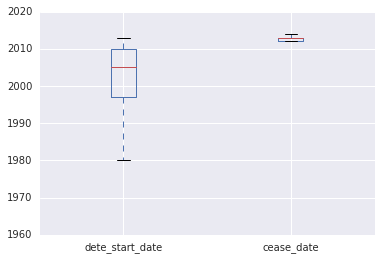

In [193]:
ax = dete_resignation[['dete_start_date','cease_date']]
ax.boxplot()
# plt.show()

#### Verifying

In [194]:
tafe_resignation['cease_date'].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

In [195]:
dete_resignation['cease_date'].value_counts().sort_index(ascending=True)

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

There aren't any major issues with the years.

To answer the questions we have, we need to calculate the years of service. This is already done in the 'tafe_resignation' dataset (at the 'institute_service' column), but not the DETE one.

### Calculating years of service (DETE)

In [196]:
dete_resignation['institute_service'] = dete_resignation['cease_date'] - dete_resignation['dete_start_date']

In [197]:
dete_resignation['institute_service'].value_counts().sort_index()

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

### Categories of Resignation (Unify and Clean Process)

Columns used to categorize employees as 'dissatisfied' from each dataframe:

TAFE dataset:
1. Contributing Factors. Dissatisfaction
2. Contributing Factors. Job Dissatisfaction

DETE dataset:
1. job_dissatisfaction
2. dissatisfaction_with_the_department
3. physical_work_environment
4. lack_of_recognition
5. lack_of_job_security
6. work_location
7. employment_conditions
8. work_life_balance
9. workload

In [198]:
cols = ['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions','work_life_balance', 'workload']
dete_resignation[cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 9 columns):
job_dissatisfaction                    311 non-null bool
dissatisfaction_with_the_department    311 non-null bool
physical_work_environment              311 non-null bool
lack_of_recognition                    311 non-null bool
lack_of_job_security                   311 non-null bool
work_location                          311 non-null bool
employment_conditions                  311 non-null bool
work_life_balance                      311 non-null bool
workload                               311 non-null bool
dtypes: bool(9)
memory usage: 5.2 KB


The columns are all boolean.

In [199]:
tafe_resignation['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [200]:
tafe_resignation['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

The columns are either having a '-' which indicates a False, or have the column name as a value for the entry, which indicates a True. 

In [201]:
# Re-phrasing the values

def update_vals(val):
    if pd.isnull(val) == True:
        return np.nan
    elif val == '-':
        return False
    return True

In [202]:
# Applying the function
tafe_resignation['Contributing Factors. Dissatisfaction'] = tafe_resignation['Contributing Factors. Dissatisfaction'].apply(update_vals)
tafe_resignation['Contributing Factors. Job Dissatisfaction'] = tafe_resignation['Contributing Factors. Job Dissatisfaction'].apply(update_vals)

In [203]:
tafe_resignation['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [204]:
tafe_resignation['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

#### Creating the column 'dissatisfied' for both datasets

In [205]:
tafe_resignation['dissatisfied'] = tafe_resignation[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].any(axis=1, skipna=False)

In [206]:
tafe_resignation['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [207]:
cols = ['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions','work_life_balance', 'workload']
dete_resignation['dissatisfied'] = dete_resignation[cols].any(axis=1, skipna=False)

In [208]:
dete_resignation['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

#### Copying cleaned data

In [209]:
dete_resignation_up = dete_resignation.copy()
tafe_resignation_up = tafe_resignation.copy()

In [210]:
dete_resignation_up['institute'] = 'DETE'
tafe_resignation_up['institute'] = 'TAFE'

#### Combining data

In [211]:
combined = pd.concat([dete_resignation_up, tafe_resignation_up])

### Finalizing

In [212]:
combined['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


To analyze the data, we'll convert these numbers into categories. We'll base our anlaysis on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions below:

    New: Less than 3 years at a company
    Experienced: 3-6 years at a company
    Established: 7-10 years at a company
    Veteran: 11 or more years at a company

For this, we can see that the first digit of the value can indicate the caregories mentioned above.

In [213]:
# Converting the 'institute_service' column in the 'combined' dataset to 'string' to easily manuplate with the date
combined['institute_service'] = combined['institute_service'].astype(str)

In [214]:
# Creating the digits pattern
pattern = r"(\d+)"

# Extracting the years
combined['years_of_service'] = combined['institute_service'].str.extract(pattern)

# Converting the result to 'float' type
combined['years_of_service'] = combined['years_of_service'].astype('float')


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:5: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



In [215]:
# Mapping values to the above categories
def categorize(val):
    if pd.isnull(val) == True:
        return val
    elif val <= 3:
        return 'New'
    elif val <= 6:
        return 'Experienced'
    elif val <= 10:
        return 'Established'
    else:
        return 'Veteran'

combined['service_category'] = combined['years_of_service'].apply(categorize)

#### Reviewing changes

In [216]:
combined['service_category'].value_counts(dropna=False)

New            276
Veteran        136
Experienced     89
NaN             88
Established     62
Name: service_category, dtype: int64

#### Filling missing data

In [217]:
combined['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

We will fill missing values with a 'False' value, since its the one that's more occuring

In [218]:
combined['dissatisfied'] = combined['dissatisfied'].fillna(value=False)

#### Reviewing changes

In [219]:
combined['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [220]:
pivot = pd.pivot_table(data=combined[['dissatisfied','service_category']], index='service_category', values='dissatisfied')

Since a True value is considered to be 1, calculating the mean will also calculate the percentage of dissatisfied employees. The default aggregation function is the mean, so we can exclude the aggfunc argument.

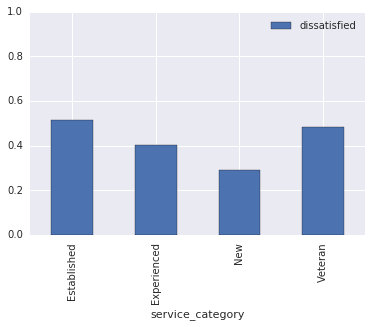

In [223]:
pivot.plot(kind='bar', ylim=(0,1))

Now, to answer the questions:

1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

From the above, we can see that this is not the case with 'new' employees. Those from the 'Established' and 'Veteran' Categories are.

2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Same thing, 'Established' employees are more resigning than 'New' ones.

# Thank  you.

#### Hashem Ahmed